In [2]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
    get_color,
)


%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = [12, 7]

In [4]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [5]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [6]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

# EXPERIENCIA

    - Sobre la 'experiencia' de las personas que respondieron la encuesta.

## GENERAL 

In [7]:
df["exp_en_IT"].value_counts()

5-9      124
<5        94
10-14     82
15-19     20
20-24      9
25-29      5
30-34      4
35-39      2
>50        1
45-49      1
Name: exp_en_IT, dtype: int64

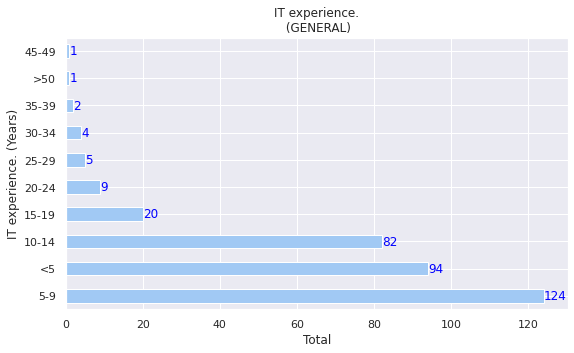

In [8]:
fig = plt.figure(figsize=(9, 5))


exp_ti_df = df["exp_en_IT"].value_counts()
exp_ti_plot = exp_ti_df.plot(
        kind="barh",
        title="IT experience.\n (GENERAL)",
        )

exp_ti_plot.set_xlabel("Total")
exp_ti_plot.set_ylabel("IT experience. (Years)")



for k, v in enumerate(df["exp_en_IT"].value_counts().values):
    exp_ti_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

## Experiencia en TI. POR GENERO

In [9]:
gen = df.groupby("genero")
print(gen.groups.keys())

dict_keys(['HOMBRE', 'MUJER', 'NO COMPARTO'])


### EXPERIENCIA EN TI - HOMBRES

In [10]:
gen.get_group("HOMBRE")["exp_en_IT"].value_counts()

5-9      98
<5       75
10-14    71
15-19    15
20-24     9
25-29     5
30-34     4
35-39     1
>50       1
Name: exp_en_IT, dtype: int64

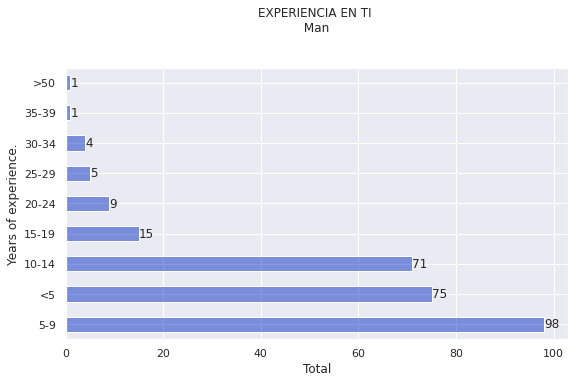

In [11]:
fig = plt.figure(figsize=(9, 5))

homb_exp_ti = gen.get_group("HOMBRE")["exp_en_IT"].value_counts()
homb_exp_ti_plot = homb_exp_ti.plot(
        kind="barh",
        title="EXPERIENCIA EN TI \n Man \n\n",
        color=get_color("Male", "light"),
        ylabel="Años de experiencia.",
        xlabel="Count",
    )


homb_exp_ti_plot.set_xlabel("Total")
homb_exp_ti_plot.set_ylabel("Years of experience.")



for k, v in enumerate(gen.get_group("HOMBRE")["exp_en_IT"].value_counts().values):
    homb_exp_ti_plot.annotate(v, (v, k), va="center")

plt.show()

### EXPERIENCIA DE TI - MUJERES

In [12]:
gen.get_group("MUJER")["exp_en_IT"].value_counts()

5-9      23
<5       14
10-14     7
15-19     4
35-39     1
Name: exp_en_IT, dtype: int64

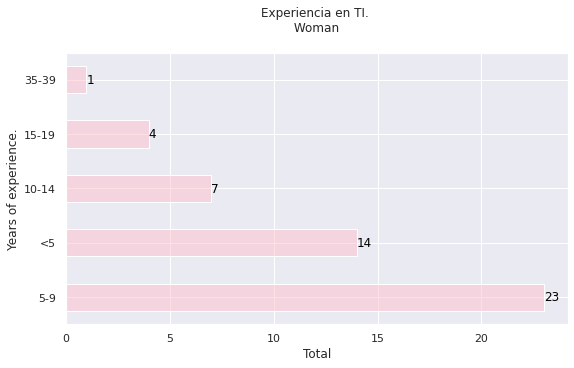

In [17]:
fig = plt.figure(figsize=(9, 5))

exp_ti_mujer = gen.get_group("MUJER")["exp_en_IT"].value_counts()
exp_ti_mujer_plot = exp_ti_mujer.plot(
        kind="barh",
        title="Experiencia en TI. \n Woman \n",
        color=get_color('Female','light'),
        ylabel="años de experiencia",
        xlabel="count",
    )


exp_ti_mujer_plot.set_xlabel("Total")
exp_ti_mujer_plot.set_ylabel("Years of experience.")



for k, v in enumerate(gen.get_group("MUJER")["exp_en_IT"].value_counts().values):
    exp_ti_mujer_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

# Experiencia en TI - HOMBRES VS MUJERES

In [18]:
male_df = gen.get_group("HOMBRE")["exp_en_IT"].value_counts()
female_df = gen.get_group("MUJER")["exp_en_IT"].value_counts()

male_years = [i for i in male_df.keys()]
female_years = [i for i in female_df.keys()]

for i in range(0, 4):
    female_years.append(0)

### Experiencia en TI. - NO DEFINIDO

In [19]:
gen.get_group("NO COMPARTO")["exp_en_IT"].value_counts()

<5       2
10-14    2
5-9      1
45-49    1
Name: exp_en_IT, dtype: int64

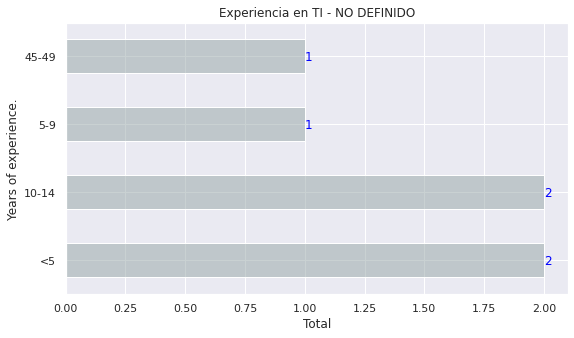

In [21]:
fig = plt.figure(figsize=(9, 5))


exp_ti_no_comp = (
    gen.get_group("NO COMPARTO")["exp_en_IT"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia en TI - NO DEFINIDO",
        color=get_color('I do not share.', 'light'),
        ylabel="Conteo.",
        xlabel="Años de experiencia",
    )
)

exp_ti_no_comp.set_xlabel("Total")
exp_ti_no_comp.set_ylabel("Years of experience.")



for k, v in enumerate(gen.get_group("NO COMPARTO")["exp_en_IT"].value_counts().values):
    exp_ti_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [22]:
gen_exp_groups = df.groupby(["genero", "exp_en_IT"])

In [23]:
gen_exp_groups.groups.keys()

dict_keys([('HOMBRE', '10-14'), ('HOMBRE', '15-19'), ('HOMBRE', '20-24'), ('HOMBRE', '25-29'), ('HOMBRE', '30-34'), ('HOMBRE', '35-39'), ('HOMBRE', '5-9'), ('HOMBRE', '<5'), ('HOMBRE', '>50'), ('MUJER', '10-14'), ('MUJER', '15-19'), ('MUJER', '35-39'), ('MUJER', '5-9'), ('MUJER', '<5'), ('NO COMPARTO', '10-14'), ('NO COMPARTO', '45-49'), ('NO COMPARTO', '5-9'), ('NO COMPARTO', '<5'), (nan, '10-14'), (nan, '15-19'), (nan, '5-9'), (nan, '<5')])

In [24]:
len(gen_exp_groups.groups.keys())

22

# Experiencia en codificacion - GENERAL

In [25]:
df["exp_en_programacion"].value_counts()

5-9      125
<5       111
10-14     64
15-19     20
20-24      7
25-29      6
30-34      4
35-39      2
Name: exp_en_programacion, dtype: int64

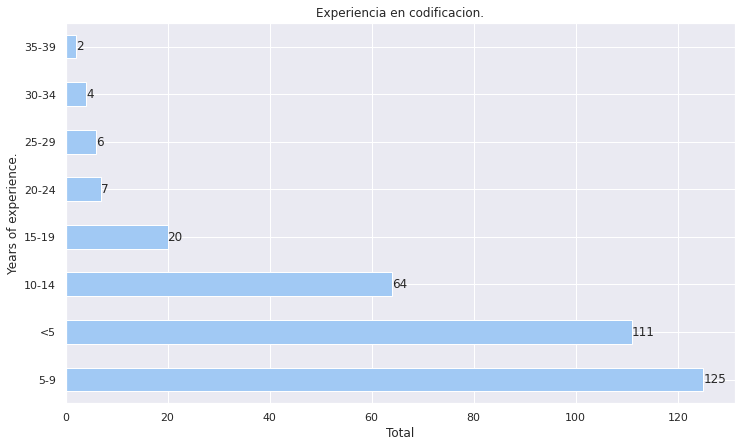

In [28]:
exp_df = df["exp_en_programacion"].value_counts()
exp_plot = exp_df.plot(
    kind="barh",
    title="Experiencia en codificacion.",
)

exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Years of experience.")



# Plot annotations.
for k, v in enumerate(exp_df):
    exp_plot.annotate(v, (v, k), va="center")

In [29]:
exp_df = df["exp_en_programacion"].value_counts(normalize=True)
print(exp_df)

5-9      0.368732
<5       0.327434
10-14    0.188791
15-19    0.058997
20-24    0.020649
25-29    0.017699
30-34    0.011799
35-39    0.005900
Name: exp_en_programacion, dtype: float64


In [30]:
for k, v in enumerate(exp_df.keys()):
    print(f"Experiencia : {v} | {exp_df.values[k]*100} %")

Experiencia : 5-9 | 36.87315634218289 %
Experiencia : <5 | 32.743362831858406 %
Experiencia : 10-14 | 18.87905604719764 %
Experiencia : 15-19 | 5.899705014749262 %
Experiencia : 20-24 | 2.0648967551622417 %
Experiencia : 25-29 | 1.7699115044247788 %
Experiencia : 30-34 | 1.1799410029498525 %
Experiencia : 35-39 | 0.5899705014749262 %


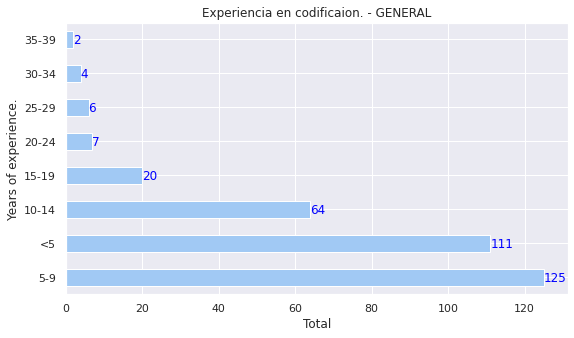

In [31]:
fig = plt.figure(figsize=(9, 5))


exp_coding = (
    df["exp_en_programacion"]
    .value_counts()
    .plot(kind="barh", title="Experiencia en codificaion. - GENERAL")
)

exp_coding.set_xlabel("Total")
exp_coding.set_ylabel("Years of experience.")



for k, v in enumerate(df["exp_en_programacion"].value_counts().values):
    exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Experiencia en codificacion. - POR GENERO

#### EXPERIENCIA CODIFICANDO - HOMBRES

In [32]:
gen.get_group("HOMBRE")["exp_en_programacion"].value_counts()

5-9      97
<5       90
10-14    57
15-19    16
20-24     7
25-29     6
30-34     4
35-39     1
Name: exp_en_programacion, dtype: int64

In [33]:
gen.get_group("HOMBRE")["exp_en_programacion"].value_counts(normalize=True)

5-9      0.348921
<5       0.323741
10-14    0.205036
15-19    0.057554
20-24    0.025180
25-29    0.021583
30-34    0.014388
35-39    0.003597
Name: exp_en_programacion, dtype: float64

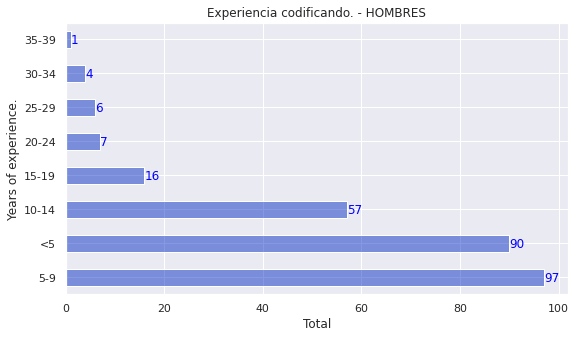

In [34]:
fig = plt.figure(figsize=(9, 5))

homb_exp_coding = (
    gen.get_group("HOMBRE")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - HOMBRES",
        color=get_color('Male','light'),
    )
)


homb_exp_coding.set_xlabel("Total")
homb_exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("HOMBRE")["exp_en_programacion"].value_counts().values
):
    homb_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EXPERIENCIA CODIFICANDO - MUJERES

In [35]:
gen.get_group("MUJER")["exp_en_programacion"].value_counts()

5-9      23
<5       17
10-14     5
15-19     2
35-39     1
Name: exp_en_programacion, dtype: int64

In [36]:
gen.get_group("MUJER")["exp_en_programacion"].value_counts(normalize=True)

5-9      0.479167
<5       0.354167
10-14    0.104167
15-19    0.041667
35-39    0.020833
Name: exp_en_programacion, dtype: float64

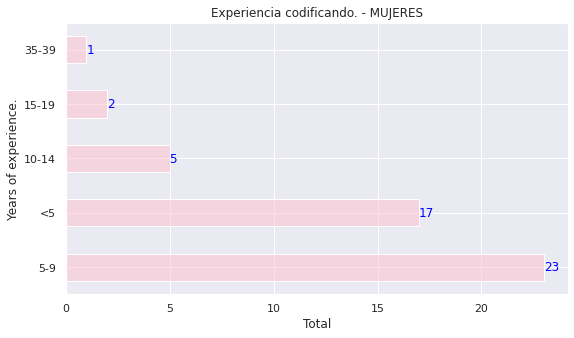

In [37]:
fig = plt.figure(figsize=(9, 5))

muj_exp_coding = (
    gen.get_group("MUJER")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - MUJERES",
        color=get_color('Female','light'),
    )
)


muj_exp_coding.set_xlabel("Total")
muj_exp_coding.set_ylabel("Years of experience.")



for k, v in enumerate(
    gen.get_group("MUJER")["exp_en_programacion"].value_counts().values
):
    muj_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EXPERIENCIA CODIFICANDO - NO COMPARTO

In [38]:
gen.get_group("NO COMPARTO")["exp_en_programacion"].value_counts()

10-14    2
5-9      1
15-19    1
<5       1
Name: exp_en_programacion, dtype: int64

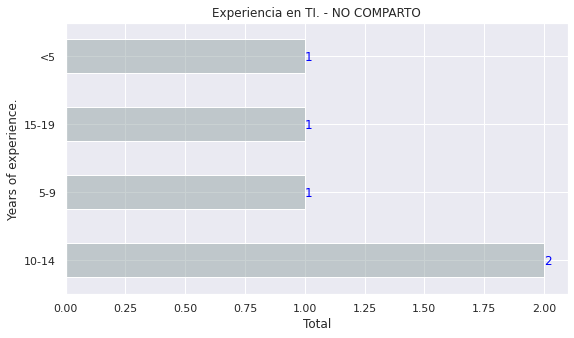

In [39]:
fig = plt.figure(figsize=(9, 5))


no_comp_exp_coding = (
    gen.get_group("NO COMPARTO")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh", title="Experiencia en TI. - NO COMPARTO", color=get_color('I do not share.','light')
    )
)


no_comp_exp_coding.set_xlabel("Total")
no_comp_exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("NO COMPARTO")["exp_en_programacion"].value_counts().values
):
    no_comp_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Primera linea de codigo en maquina. - GENERAL

In [40]:
df["1_linea_de_codigo"].value_counts()

<10      101
10-11     55
14-15     51
12-13     37
16-17     31
18-19     27
20-21     16
>30        6
22-23      4
26-27      4
24-25      3
28-29      3
Name: 1_linea_de_codigo, dtype: int64

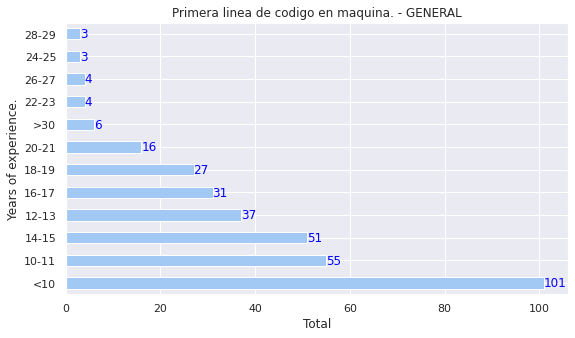

In [41]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding = (
    df["1_linea_de_codigo"]
    .value_counts()
    .plot(kind="barh", title="Primera linea de codigo en maquina. - GENERAL")
)

prim_linea_coding.set_xlabel("Total")
prim_linea_coding.set_ylabel("Years of experience.")



for k, v in enumerate(df["1_linea_de_codigo"].value_counts().values):
    prim_linea_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

# PRIMERA LINEA DE CODIGO EN MAQUINA - POR GENERO


### PRIMERA LINEA EN MAQUINA - SOLO HOMBRES

In [42]:
gen.get_group("HOMBRE")["1_linea_de_codigo"].value_counts()

<10      86
10-11    45
14-15    38
16-17    29
12-13    29
18-19    22
20-21    11
>30       5
26-27     4
24-25     3
22-23     3
28-29     2
Name: 1_linea_de_codigo, dtype: int64

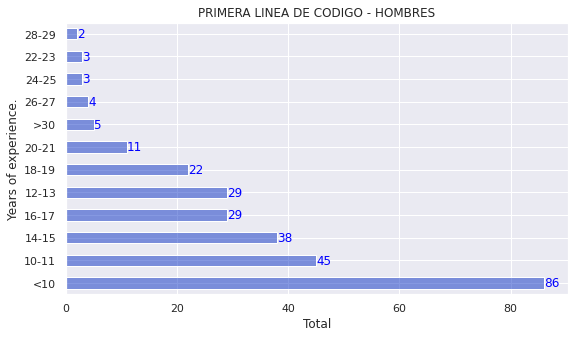

In [43]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_hombres = (
    gen.get_group("HOMBRE")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA DE CODIGO - HOMBRES",
        color=get_color('Male','light'),
    )
)


prim_linea_coding_hombres.set_xlabel("Total")
prim_linea_coding_hombres.set_ylabel("Years of experience.")



for k, v in enumerate(
    gen.get_group("HOMBRE")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_coding_hombres.annotate(v, (v, k), va="center", color="blue")

plt.show()

### PRIMERA LINEA EN MAQUINA - MUJERES

In [44]:
gen.get_group("MUJER")["1_linea_de_codigo"].value_counts()

<10      13
14-15    12
12-13     7
10-11     6
18-19     4
20-21     2
16-17     1
28-29     1
>30       1
Name: 1_linea_de_codigo, dtype: int64

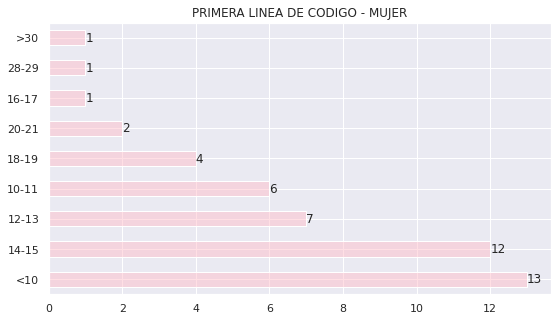

In [45]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_mujeres = (
    gen.get_group("MUJER")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh", title="PRIMERA LINEA DE CODIGO - MUJER", color=get_color('Female','light')
    )
)

for k, v in enumerate(
    gen.get_group("MUJER")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_coding_mujeres.annotate(v, (v, k), va="center")

plt.show()

# PRIMERA LINEA EN MAQUINA - NO DEFINIDO

In [46]:
gen.get_group("NO COMPARTO")["1_linea_de_codigo"].value_counts()

10-11    2
22-23    1
18-19    1
14-15    1
20-21    1
Name: 1_linea_de_codigo, dtype: int64

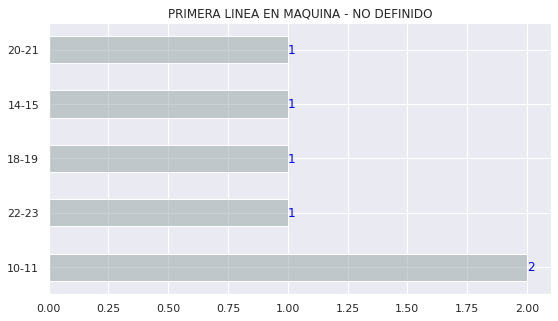

In [47]:
fig = plt.figure(figsize=(9, 5))

prim_linea_cod_no_comp = (
    gen.get_group("NO COMPARTO")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA EN MAQUINA - NO DEFINIDO",
        color=get_color('I do not share.', 'light'),
    )
)


for k, v in enumerate(
    gen.get_group("NO COMPARTO")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_cod_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

# GENERAL

### EXPERIENCIA VS MODALIDAD

- Se pretende explorar el tipo de trabajo que realizan segun la experiencia en TI.

In [48]:
exp = df.groupby("exp_en_IT")

In [49]:
exp_cats = [i for i in exp.groups.keys()]

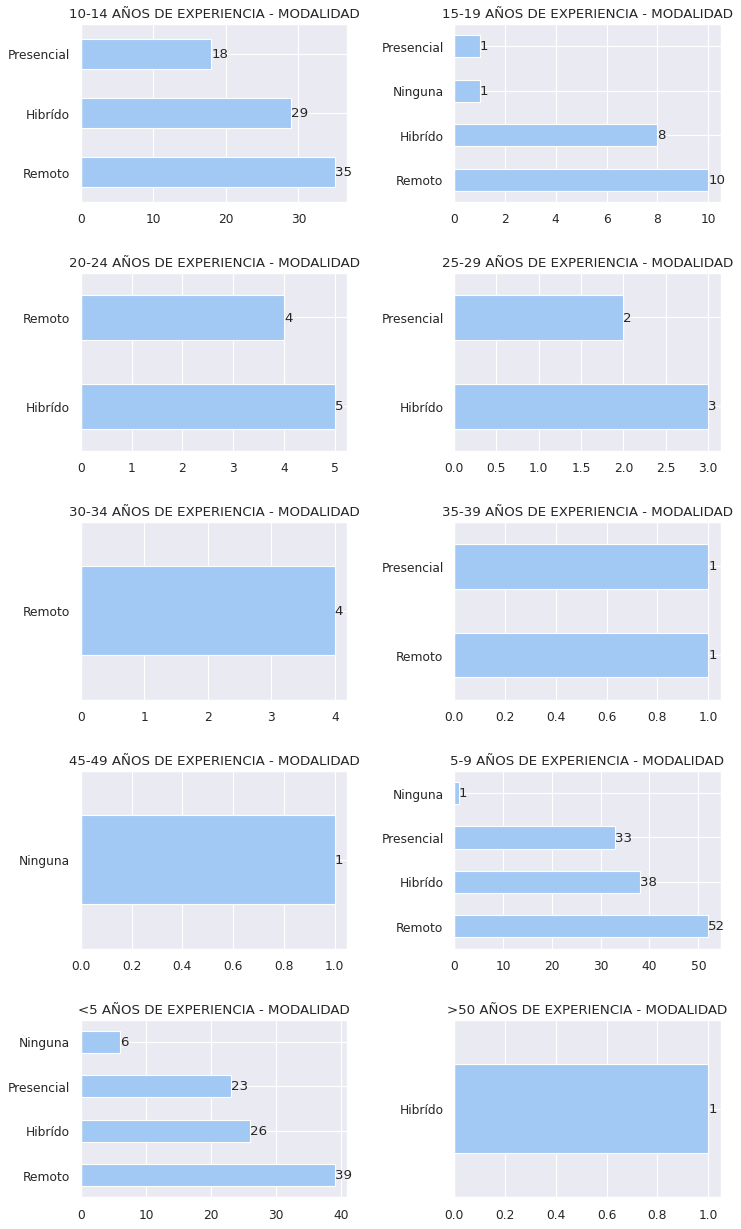

In [61]:
plt.figure(figsize=(10, 30), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(8, 2, k + 1)
    mod = (
        exp.get_group(v)["modalidad"]
        .value_counts()
        .plot(
            kind="barh",
            ylabel="",
            title="{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(v),
        )
    )
    for l, m in enumerate(exp.get_group(v)["modalidad"].value_counts().values):
        mod.annotate(m, (m, l), va="center")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [62]:
for k, v in enumerate(exp_cats):
    mod = exp.get_group(v)["modalidad"].value_counts(normalize=True)

    print("{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(v))
    print("=" * 39)
    print(mod)
    print("\n" * 3)

10-14 AÑOS DE EXPERIENCIA - MODALIDAD
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: modalidad, dtype: float64




15-19 AÑOS DE EXPERIENCIA - MODALIDAD
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: modalidad, dtype: float64




20-24 AÑOS DE EXPERIENCIA - MODALIDAD
Hibrído    0.555556
Remoto     0.444444
Name: modalidad, dtype: float64




25-29 AÑOS DE EXPERIENCIA - MODALIDAD
Hibrído       0.6
Presencial    0.4
Name: modalidad, dtype: float64




30-34 AÑOS DE EXPERIENCIA - MODALIDAD
Remoto    1.0
Name: modalidad, dtype: float64




35-39 AÑOS DE EXPERIENCIA - MODALIDAD
Remoto        0.5
Presencial    0.5
Name: modalidad, dtype: float64




45-49 AÑOS DE EXPERIENCIA - MODALIDAD
Ninguna    1.0
Name: modalidad, dtype: float64




5-9 AÑOS DE EXPERIENCIA - MODALIDAD
Remoto        0.419355
Hibrído       0.306452
Presencial    0.266129
Ninguna       0.008065
Name: modalidad, dtype: float64




<5 AÑOS DE EXPERIENCIA - MODALID

In [63]:
for k, v in enumerate(exp_cats):
    d = exp.get_group(v)["modalidad"].value_counts(normalize=True)
    print("_" * 34)
    print(f"Años de experiencia:{v}")
    print("_" * 34)
    print(d)
    print("\n" * 3)

__________________________________
Años de experiencia:10-14
__________________________________
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:15-19
__________________________________
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:20-24
__________________________________
Hibrído    0.555556
Remoto     0.444444
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:25-29
__________________________________
Hibrído       0.6
Presencial    0.4
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:30-34
__________________________________
Remoto    1.0
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:35-39
__________________________________
Remoto   

### EXPERIENCIA EN TI  VS IMPORTANCIA DE LA EDUCACION FORMAL
    - Postura sobre la "importancia de la educacion formal" de los que respondieron la
    encuesta segun los años de experiencia en TI.

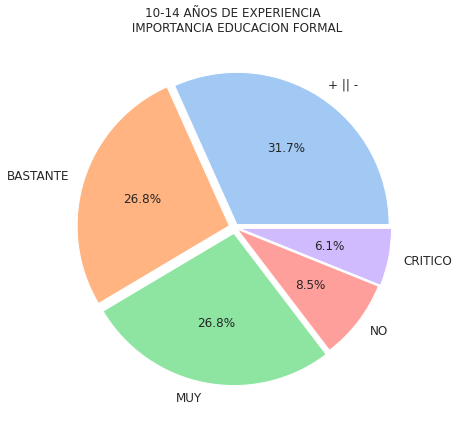

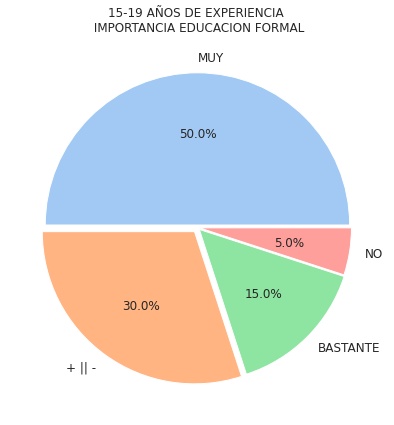

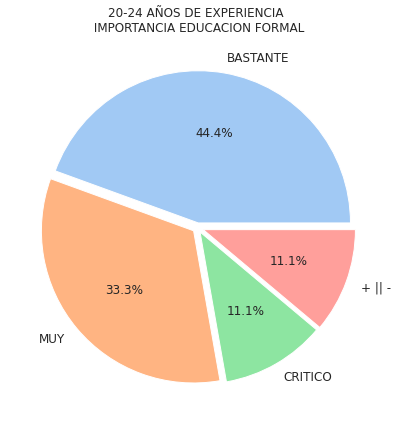

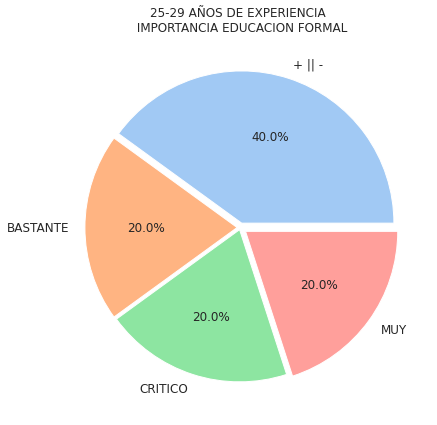

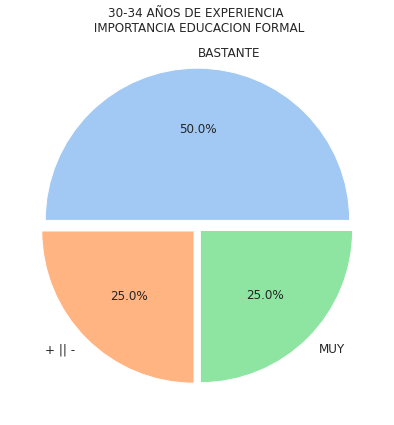

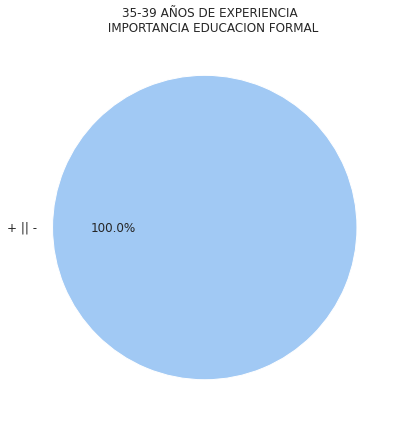

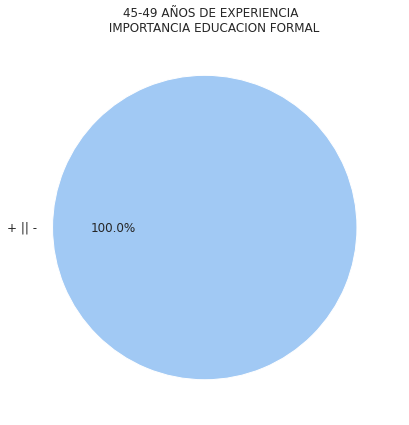

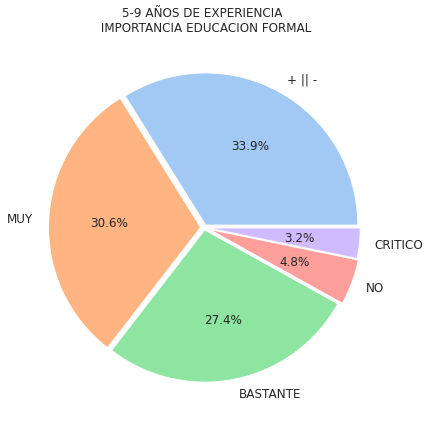

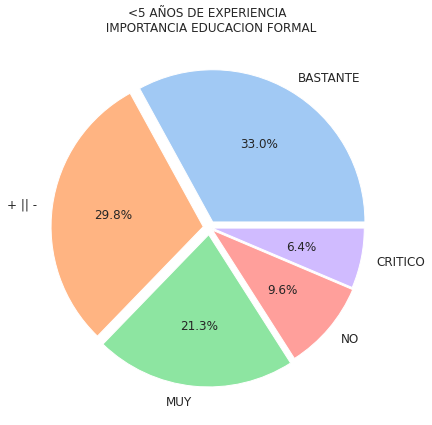

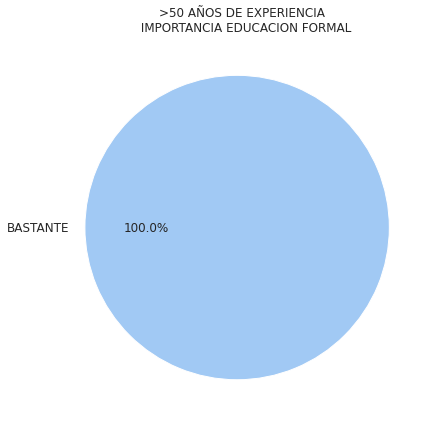

In [64]:
# plt.figure(figsize=(10, 60), dpi=80)


for k, v in enumerate(exp_cats):
    # plt.subplot(18, 2, k + 1)
    imp_df = exp.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    imp_plot = imp_df.plot(
            kind="pie",
            title="{0} AÑOS DE EXPERIENCIA \n IMPORTANCIA EDUCACION FORMAL".format(v),
            ylabel="",
            autopct="%1.1f%%",
            textprops={"fontsize": 12},
            explode=explode_pie(imp_df.size),
        )
    
    plt.show()

    # for l, m in enumerate(exp.get_group(v)["imp_ed_formal"].value_counts().values):
    #   imp.annotate(m, (m, l), va="center", color="blue")


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

### EXPERIENCIA EN TI VS LENGUAJE FAVORITO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje favorito.

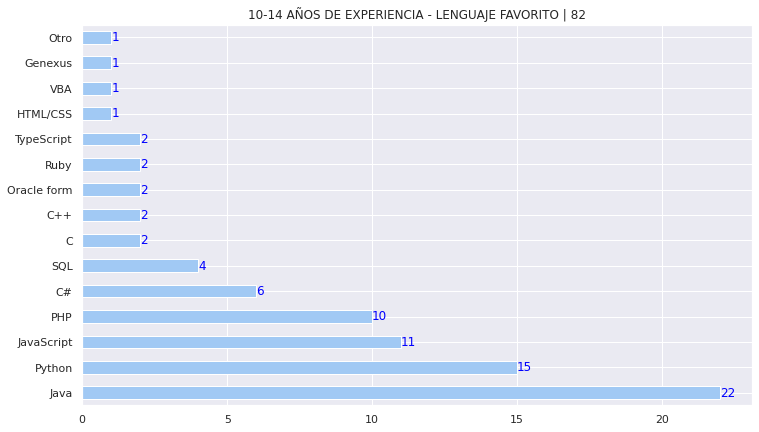

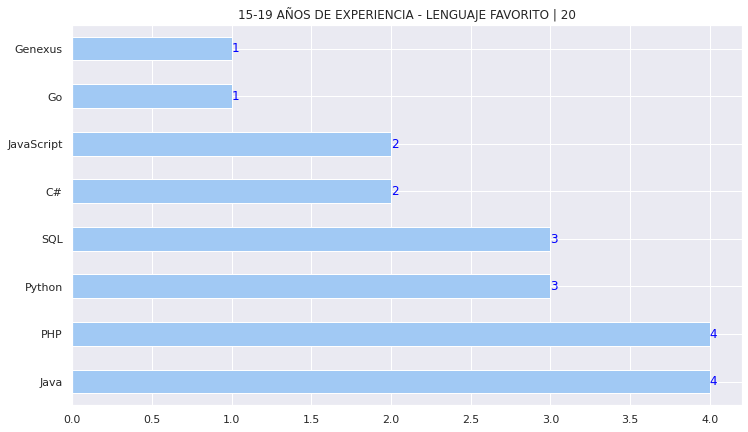

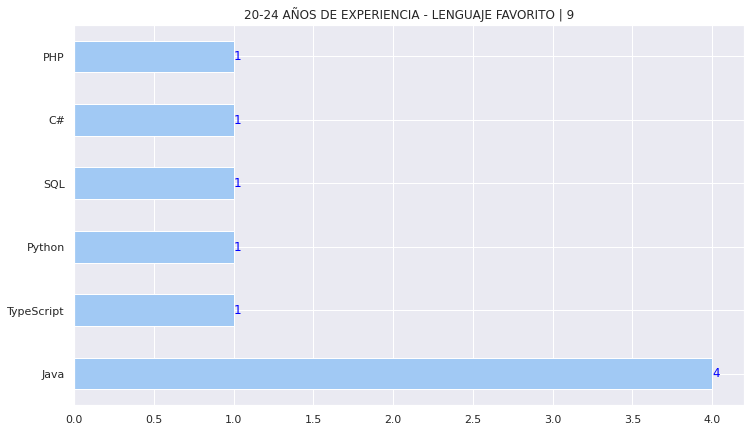

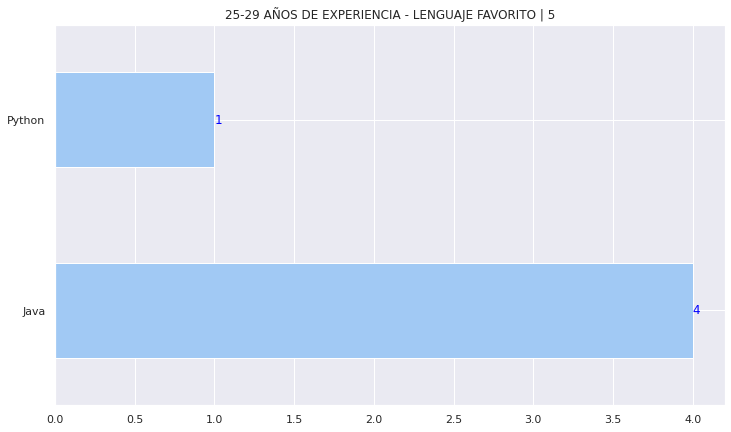

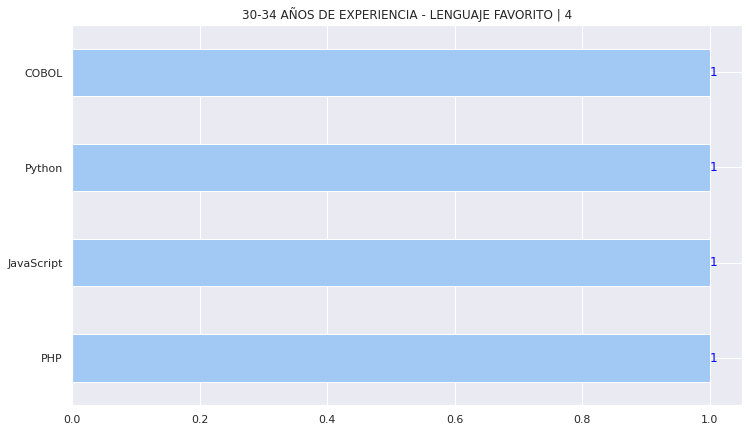

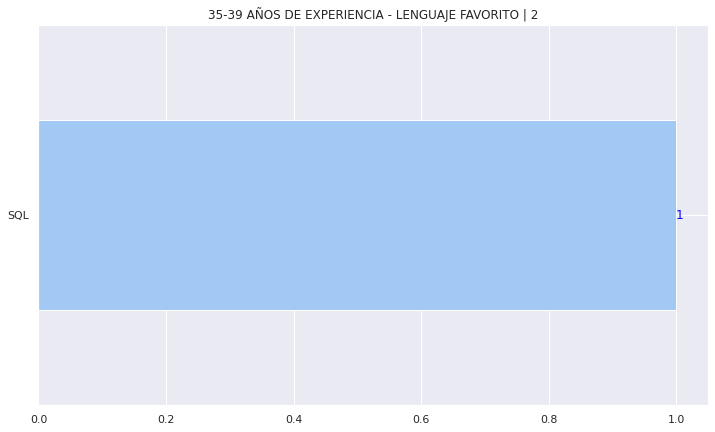

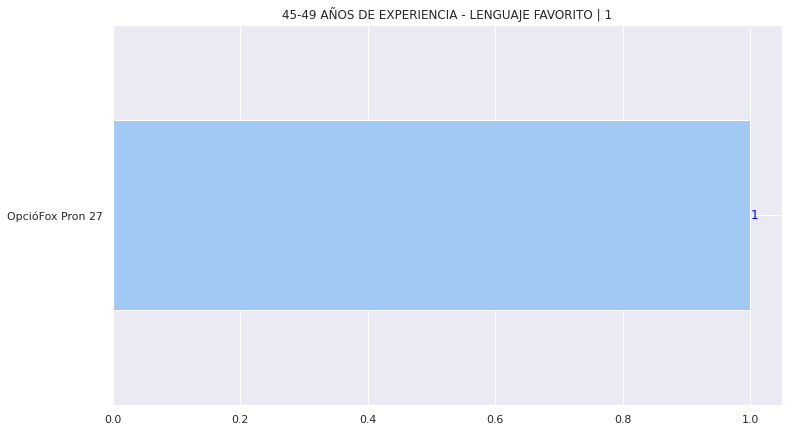

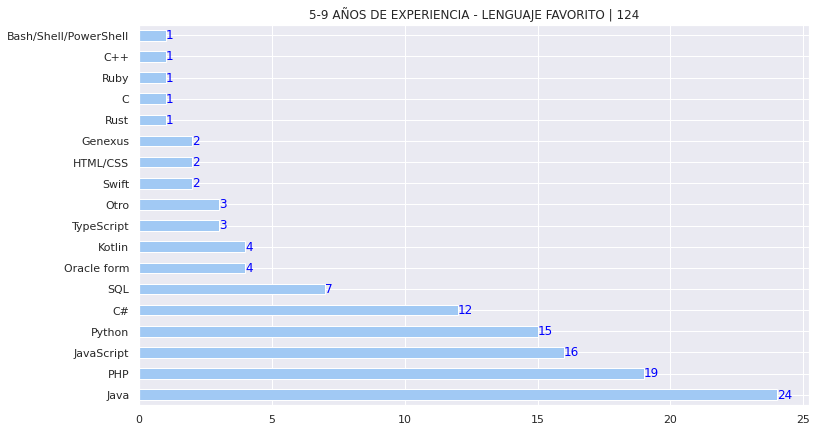

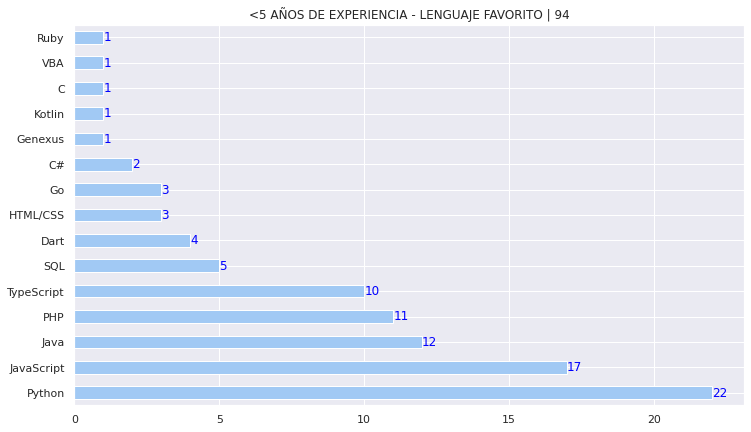

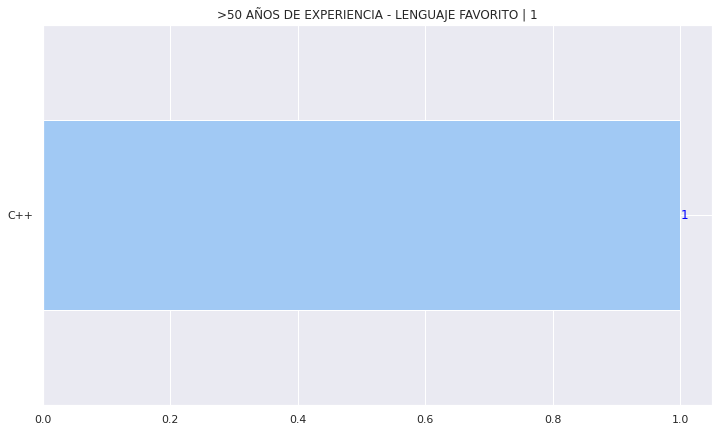

In [65]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    # plt.subplot(18, 1, k + 1)
    leng = (
        exp.get_group(v)["leng_fav"]
        .value_counts()
        .plot(
            kind="barh",
            title="{0} AÑOS DE EXPERIENCIA - LENGUAJE FAVORITO | {1}".format(
                v, exp.get_group(v)["leng_fav"].shape[0]
            ),
        )
    )

    for l, m in enumerate(exp.get_group(v)["leng_fav"].value_counts().values):
        leng.annotate(m, (m, l), va="center", color="blue")
    plt.show()
    print("\n" * 3)


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS ORIGEN DEL TRABAJO
  - Se explora la experiencia en TI vs el origen del trabajo que realiza el encuestado.

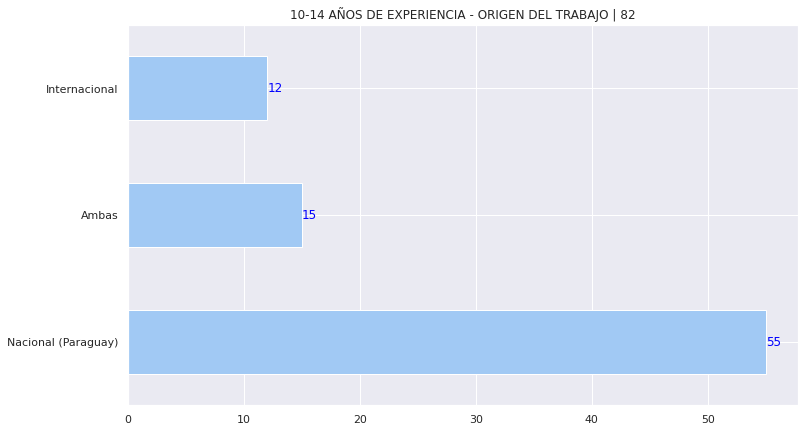

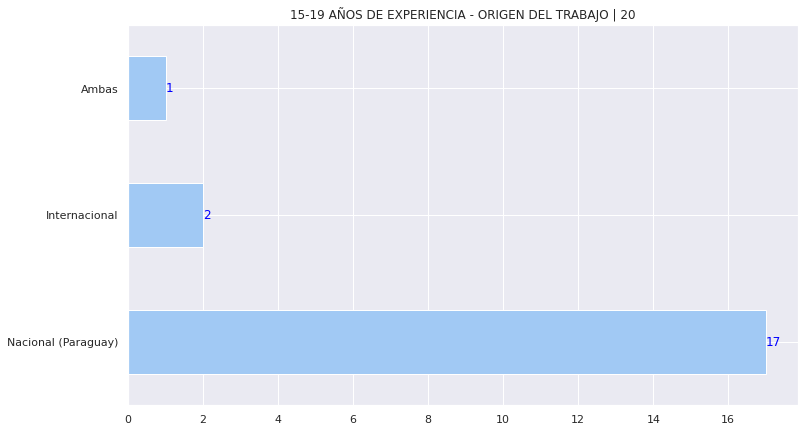

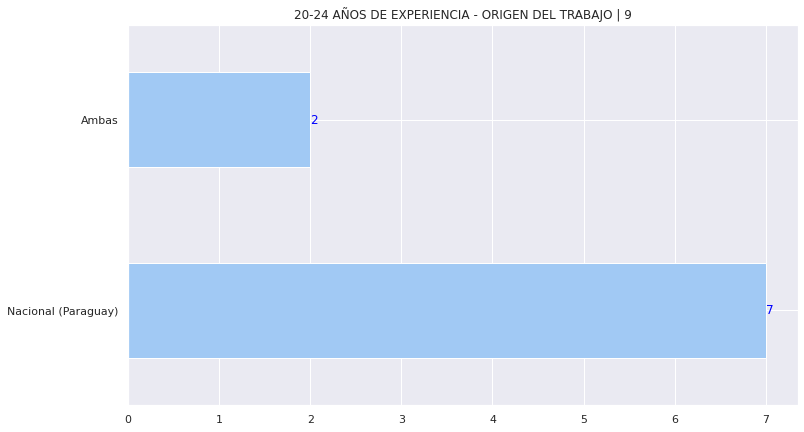

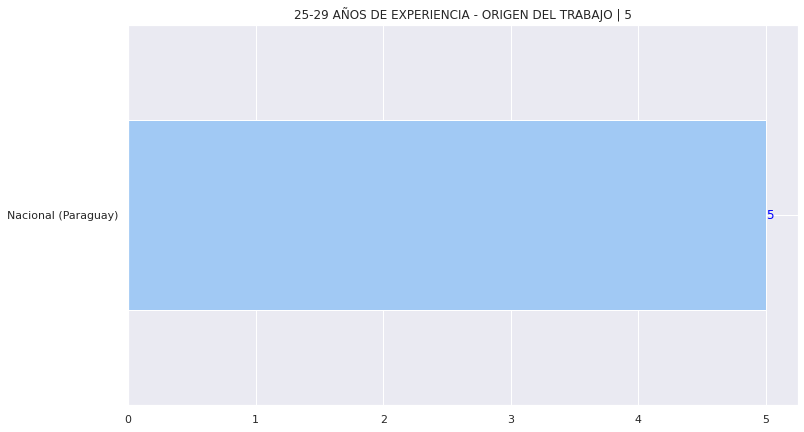

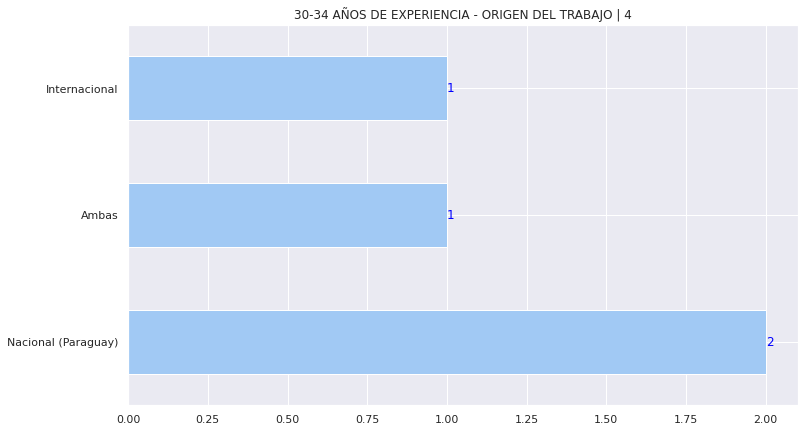

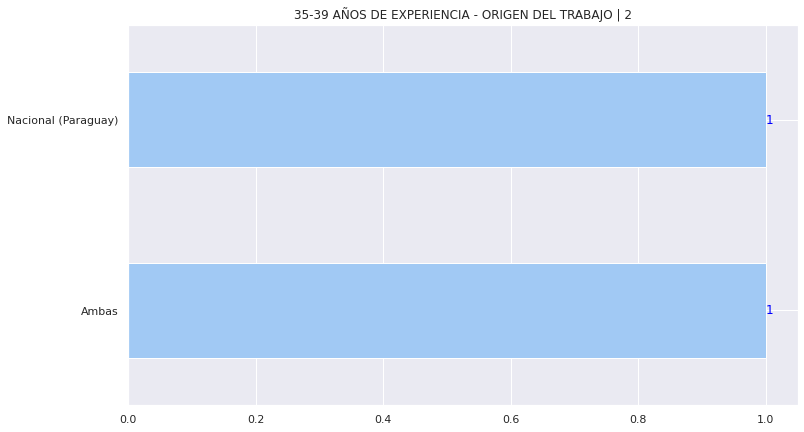

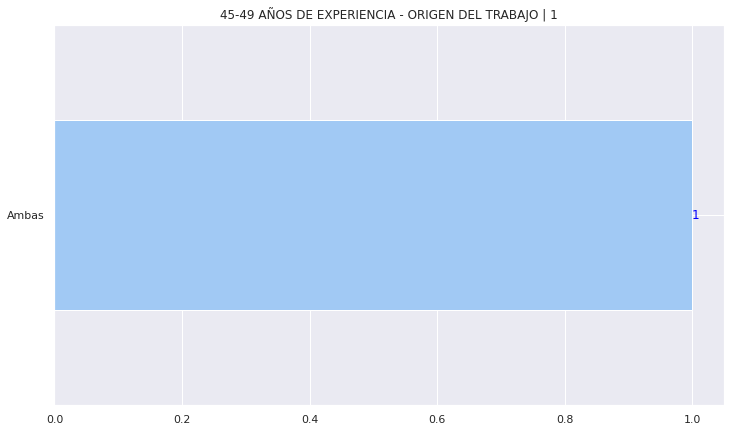

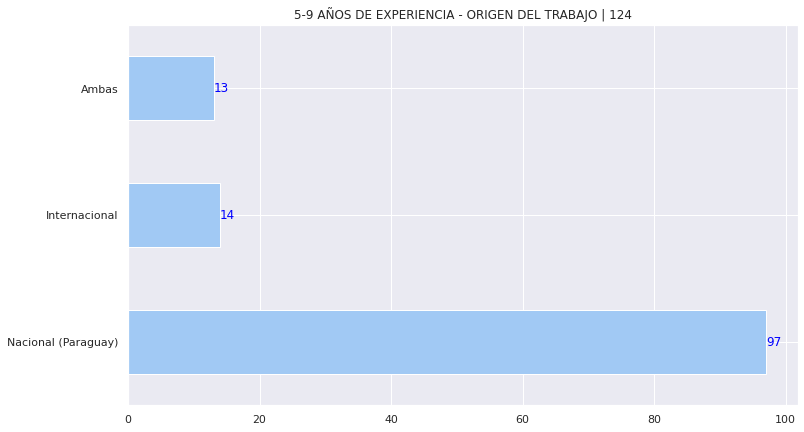

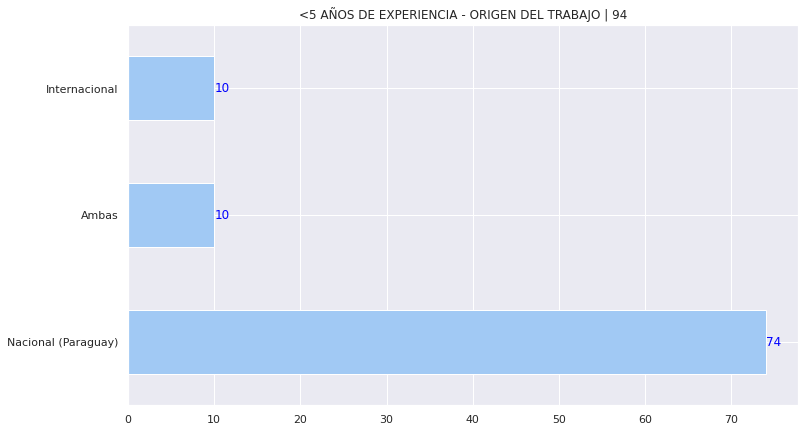

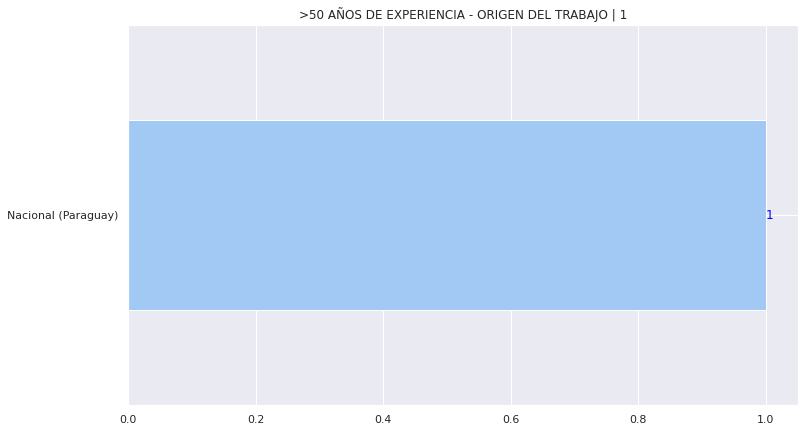

In [66]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    #   plt.subplot(18, 1, k + 1)
    if len(exp.get_group(v)["trabajo"].value_counts()) != 0:
        trab_exp = (
            exp.get_group(v)["trabajo"]
            .value_counts()
            .plot(
                kind="barh",
                title="{0} AÑOS DE EXPERIENCIA - ORIGEN DEL TRABAJO | {1}".format(
                    v, exp.get_group(v)["trabajo"].shape[0]
                ),
            )
        )
        for l, m in enumerate(exp.get_group(v)["trabajo"].value_counts().values):
            trab_exp.annotate(m, (m, l), va="center", color="blue")

        plt.show()
        print("\n" * 3)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS TIPO DE TRABAJO
  - Se explora la experiencia en TI vs el tipo de trabajo que realizan los encuestados.

In [67]:
tt = get_column_uniques(df, "tipo_de_trabajo")

In [68]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [69]:
for i in tt:
    d = df[df["tipo_de_trabajo"].str.contains(i)]
    print("Tipo de trabajo. -> ", i)
    print("=" * 35)
    print(d["exp_en_IT"].value_counts())
    print("=" * 29)
    print("\n" * 3)

Tipo de trabajo. ->  QA o testing
5-9      9
<5       7
10-14    7
15-19    3
30-34    2
20-24    2
25-29    2
35-39    1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Project Lead
10-14    25
5-9      16
20-24     7
15-19     5
25-29     5
35-39     1
<5        1
45-49     1
30-34     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev mobile
5-9      20
<5       18
10-14    16
20-24     2
25-29     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev front-end
5-9      34
<5       31
10-14    23
25-29     4
15-19     4
20-24     3
35-39     1
30-34     1
45-49     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev de videojuegos
10-14    2
5-9      1
<5       1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  DB Admin
5-9      25
10-14    20
<5       12
15-19     5
30-34     3
25-29     3
20-24     2
35-39     1
45-49     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev de sist. embebidos
5-9      7
10-14    5
20-24    2
35-39    

### PRIMERA LINEA DE CODIGO VS OCUPACION

In [70]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [71]:
carers = df.groupby("carr_especialidades")

In [72]:
carreras = df["carr_especialidades"].value_counts().keys()

In [73]:
len(carreras)

32

<10      0.285714
14-15    0.180952
10-11    0.123810
12-13    0.114286
16-17    0.104762
18-19    0.104762
20-21    0.057143
>30      0.019048
22-23    0.009524
Name: 1_linea_de_codigo, dtype: float64






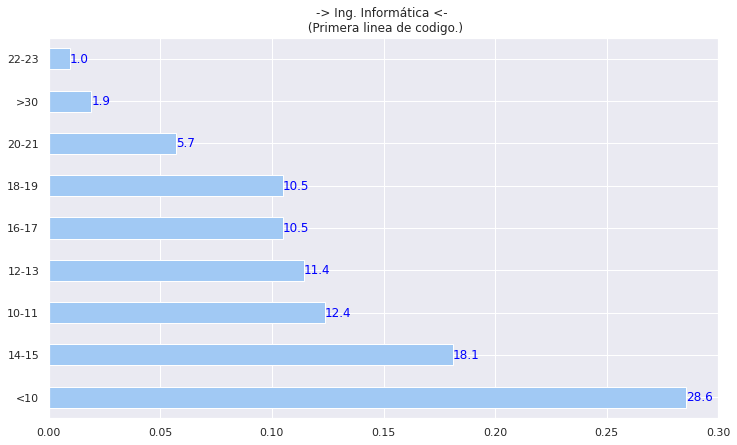





<10      0.279412
10-11    0.264706
14-15    0.117647
16-17    0.102941
12-13    0.088235
20-21    0.058824
18-19    0.044118
24-25    0.014706
22-23    0.014706
>30      0.014706
Name: 1_linea_de_codigo, dtype: float64






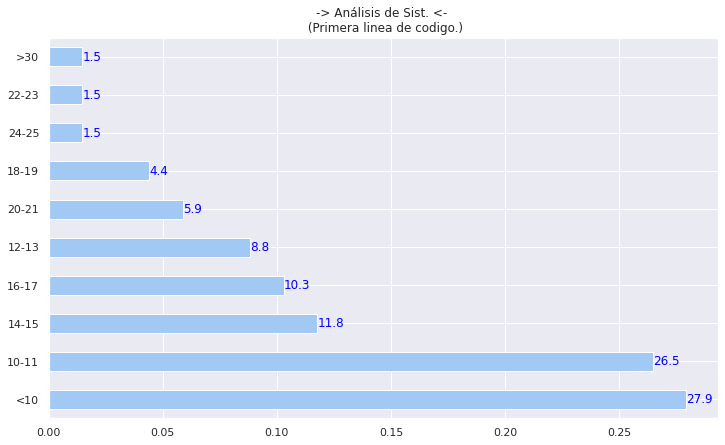





10-11    0.272727
<10      0.212121
14-15    0.181818
12-13    0.121212
16-17    0.090909
26-27    0.030303
18-19    0.030303
>30      0.030303
28-29    0.030303
Name: 1_linea_de_codigo, dtype: float64






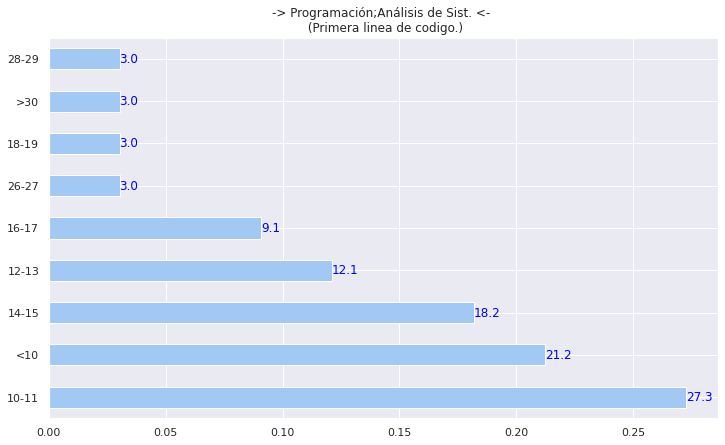





<10      0.35
14-15    0.15
18-19    0.15
12-13    0.15
10-11    0.10
24-25    0.05
16-17    0.05
Name: 1_linea_de_codigo, dtype: float64






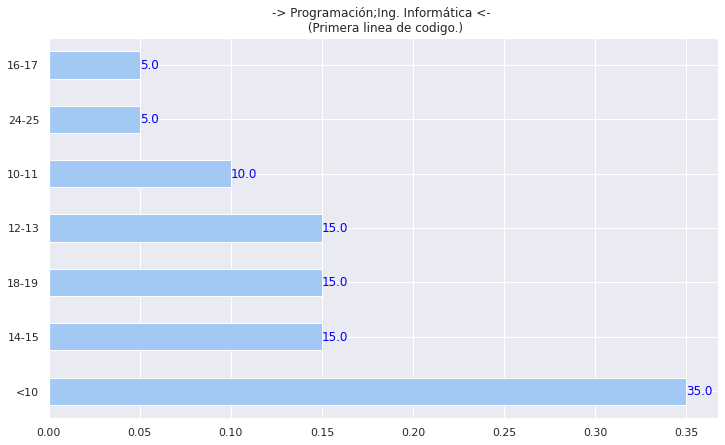





<10      0.294118
16-17    0.176471
10-11    0.176471
14-15    0.176471
12-13    0.117647
18-19    0.058824
Name: 1_linea_de_codigo, dtype: float64






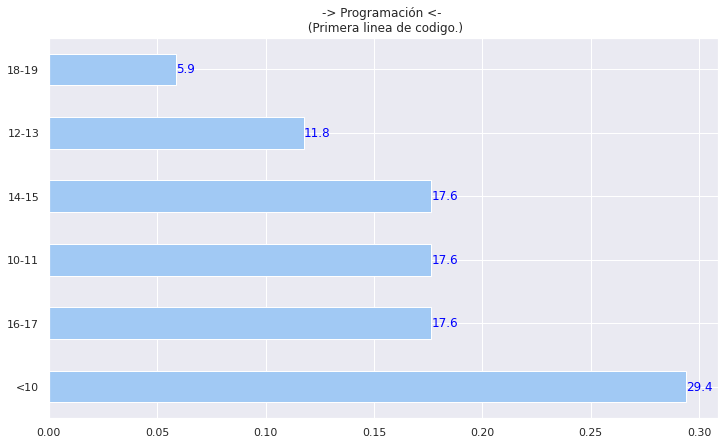





<10      0.352941
18-19    0.176471
16-17    0.117647
12-13    0.117647
14-15    0.058824
20-21    0.058824
26-27    0.058824
10-11    0.058824
Name: 1_linea_de_codigo, dtype: float64






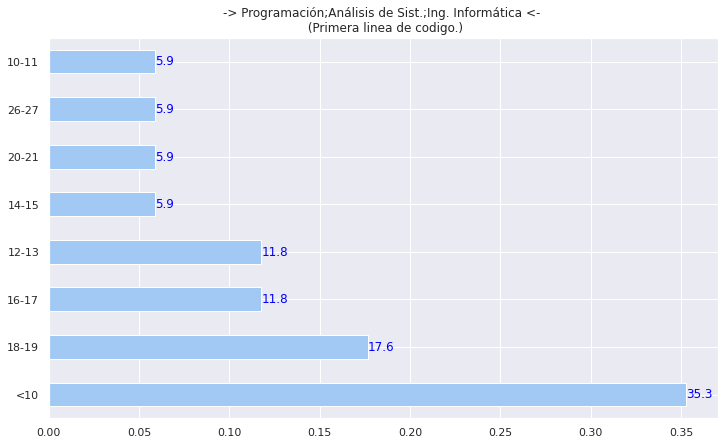





14-15    0.333333
<10      0.333333
18-19    0.133333
12-13    0.066667
10-11    0.066667
26-27    0.066667
Name: 1_linea_de_codigo, dtype: float64






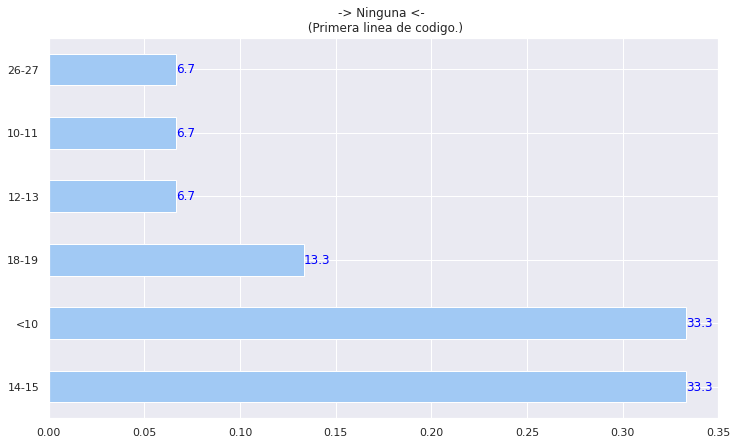





12-13    0.272727
20-21    0.181818
<10      0.181818
26-27    0.090909
10-11    0.090909
18-19    0.090909
16-17    0.090909
Name: 1_linea_de_codigo, dtype: float64






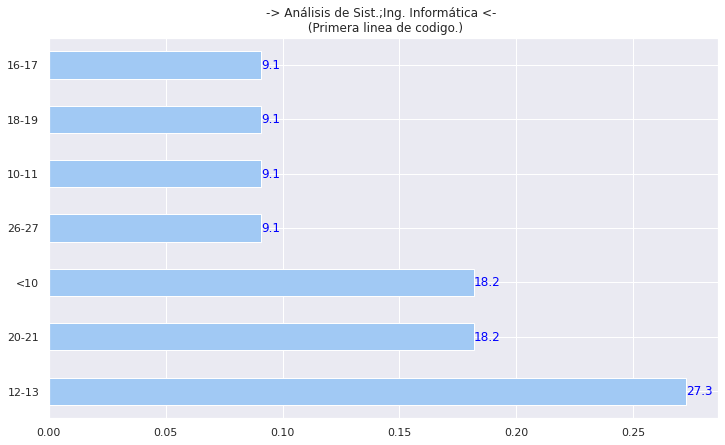





12-13    0.166667
10-11    0.166667
20-21    0.166667
<10      0.166667
18-19    0.166667
16-17    0.166667
Name: 1_linea_de_codigo, dtype: float64






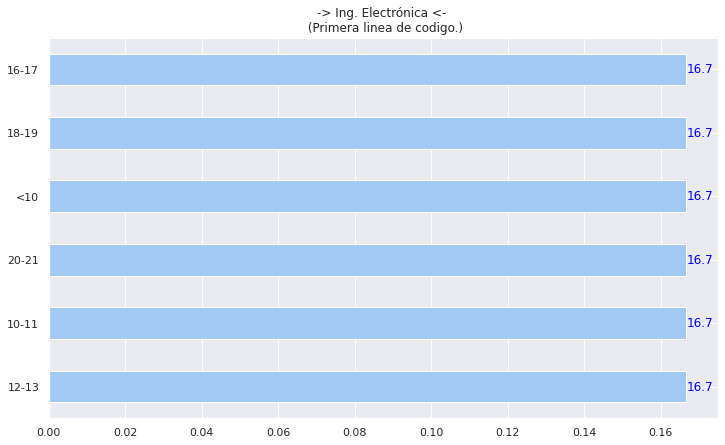





<10      0.6
28-29    0.2
14-15    0.2
Name: 1_linea_de_codigo, dtype: float64






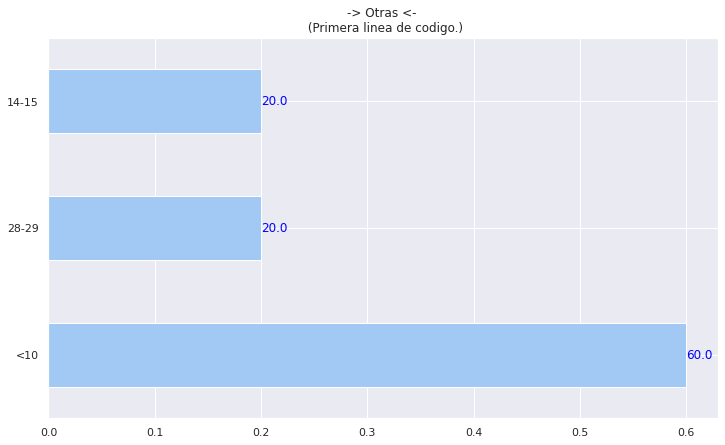





14-15    0.4
12-13    0.2
16-17    0.2
10-11    0.2
Name: 1_linea_de_codigo, dtype: float64






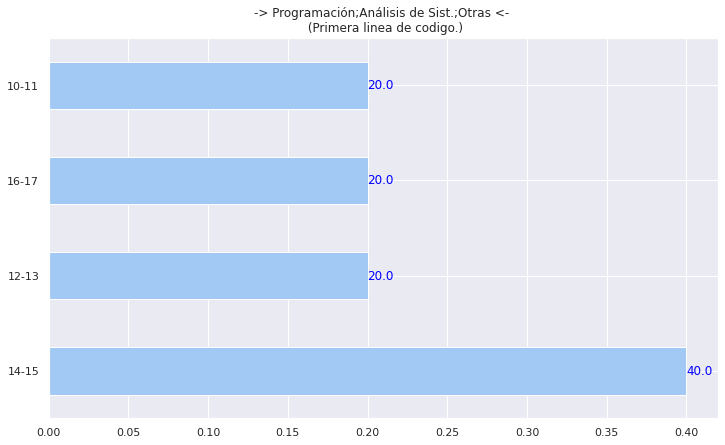





14-15    0.25
<10      0.25
12-13    0.25
10-11    0.25
Name: 1_linea_de_codigo, dtype: float64






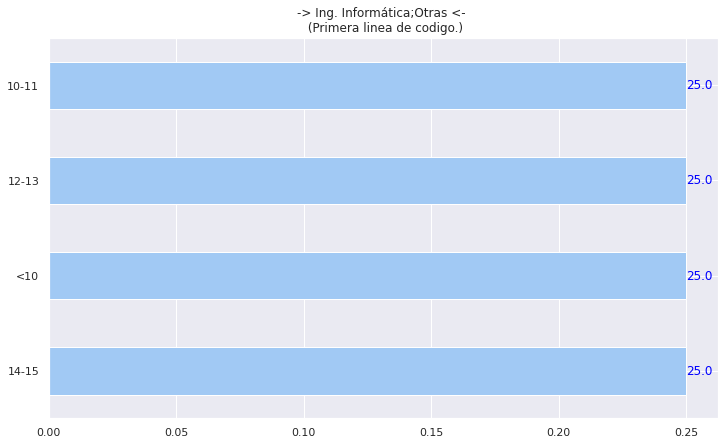





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






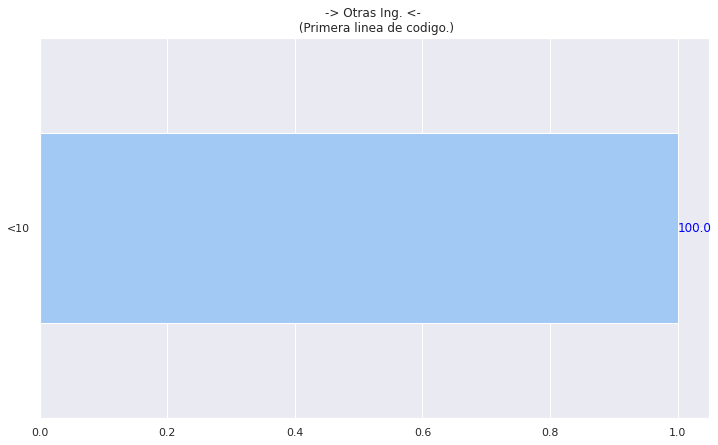





10-11    0.333333
<10      0.333333
16-17    0.333333
Name: 1_linea_de_codigo, dtype: float64






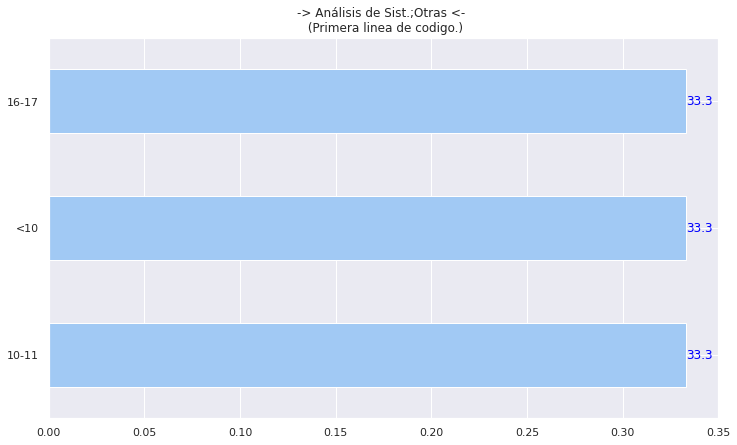





10-11    0.333333
12-13    0.333333
24-25    0.333333
Name: 1_linea_de_codigo, dtype: float64






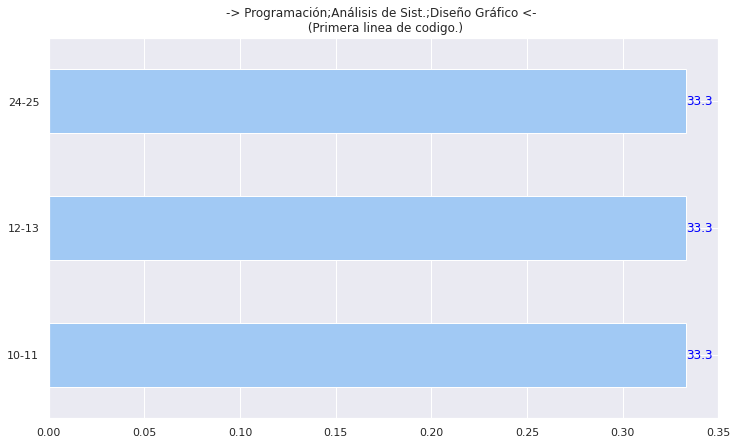





>30      0.5
10-11    0.5
Name: 1_linea_de_codigo, dtype: float64






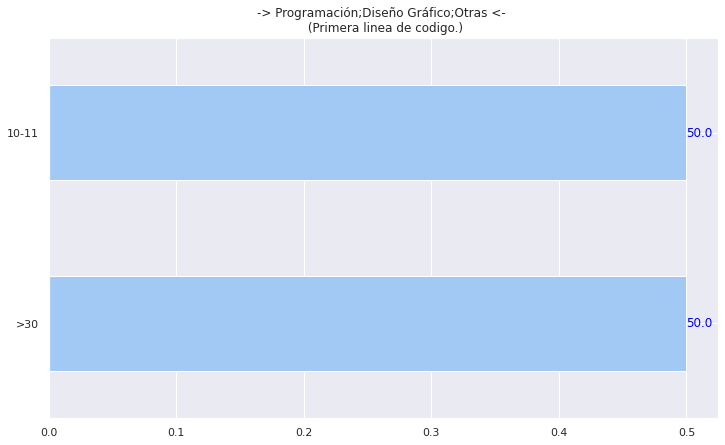





28-29    0.5
<10      0.5
Name: 1_linea_de_codigo, dtype: float64






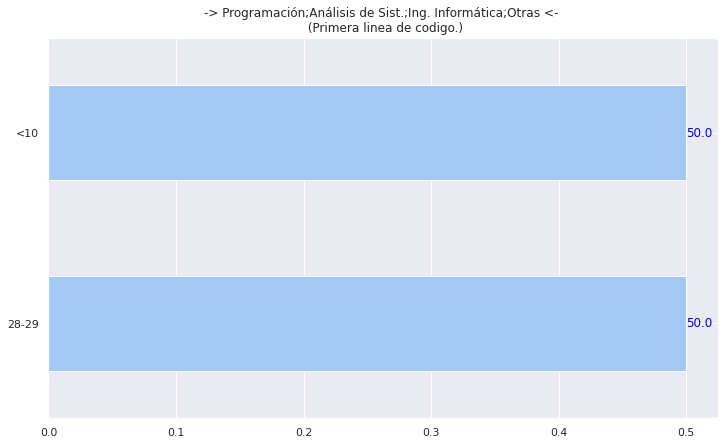





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






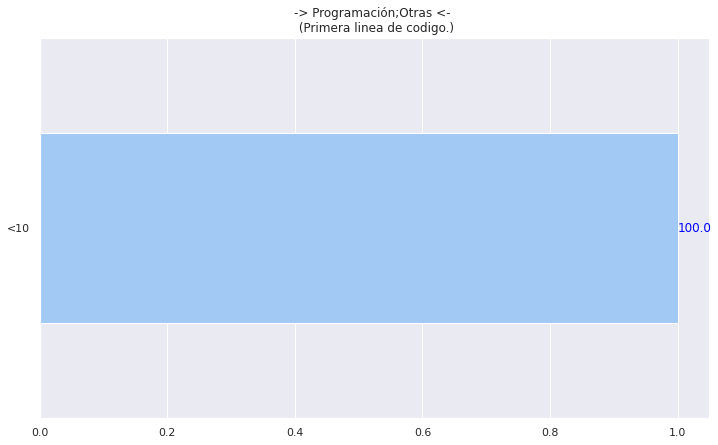





20-21    0.5
<10      0.5
Name: 1_linea_de_codigo, dtype: float64






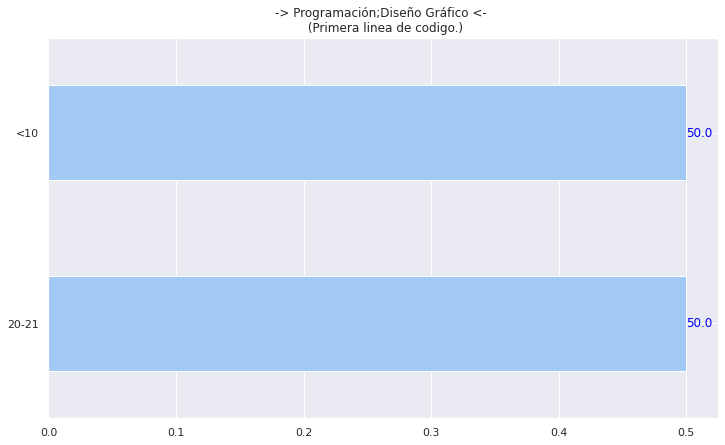





22-23    0.5
20-21    0.5
Name: 1_linea_de_codigo, dtype: float64






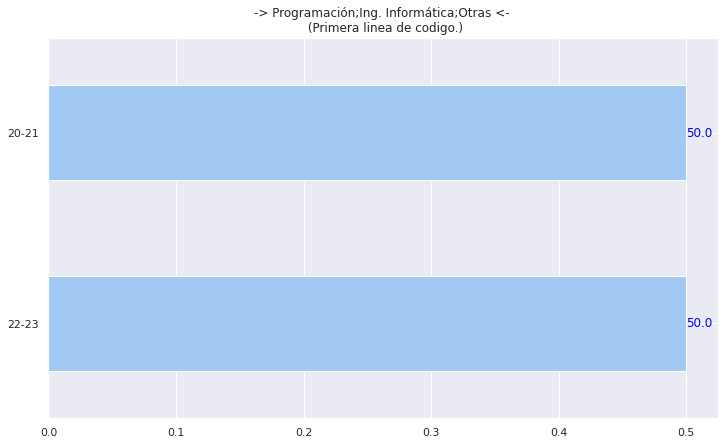





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






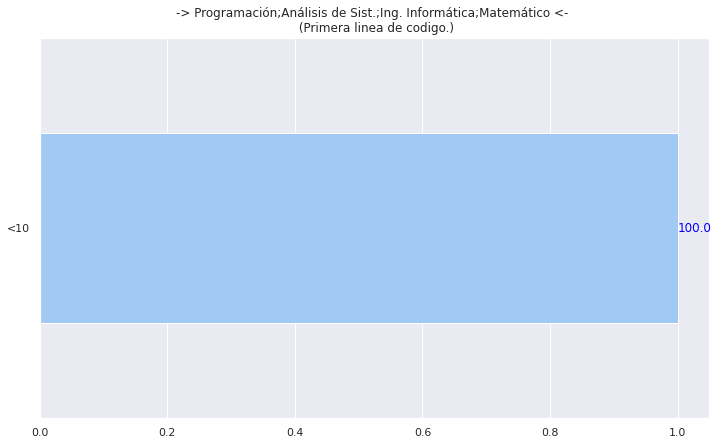





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






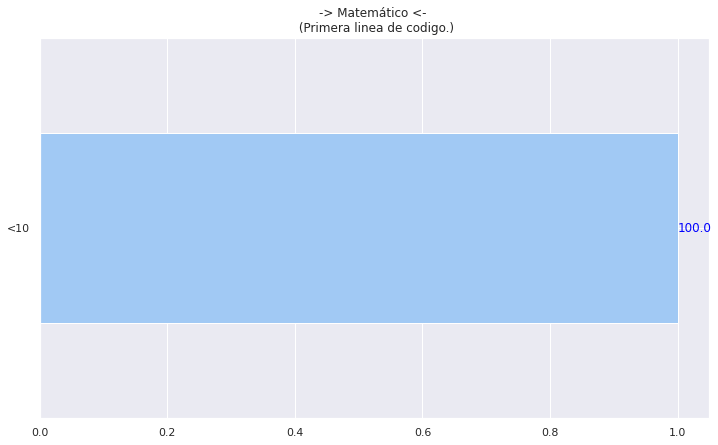





14-15    1.0
Name: 1_linea_de_codigo, dtype: float64






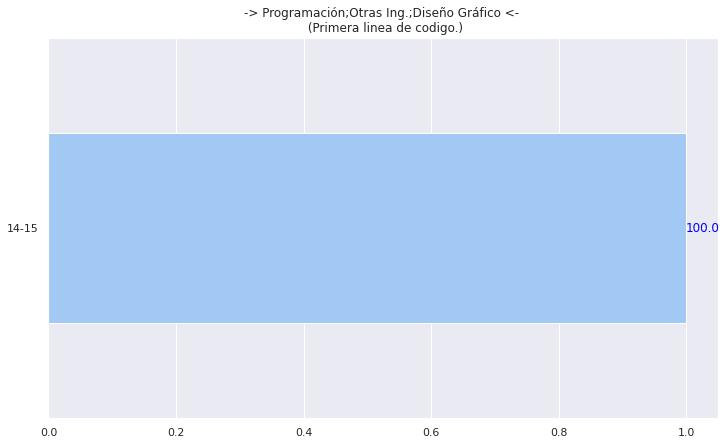





22-23    1.0
Name: 1_linea_de_codigo, dtype: float64






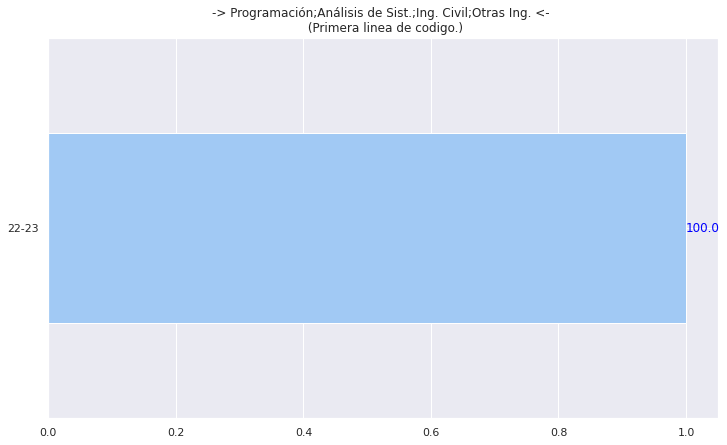





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






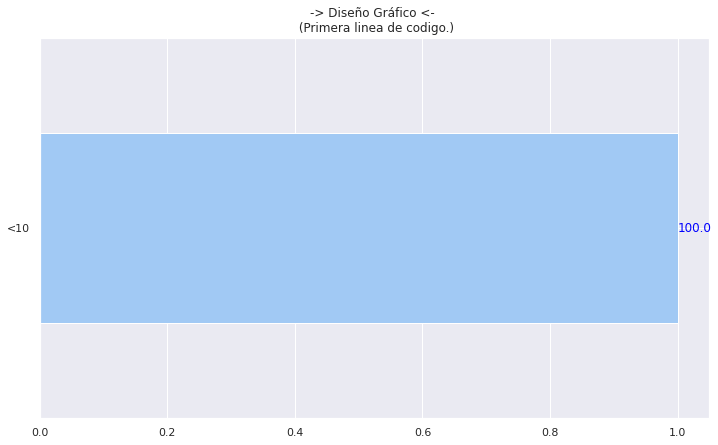





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






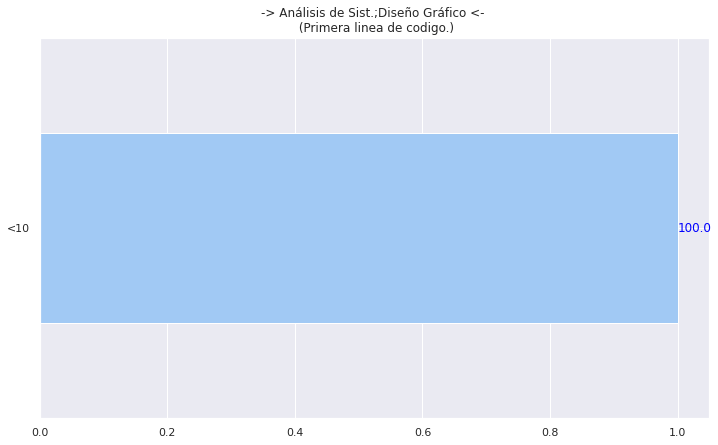





18-19    1.0
Name: 1_linea_de_codigo, dtype: float64






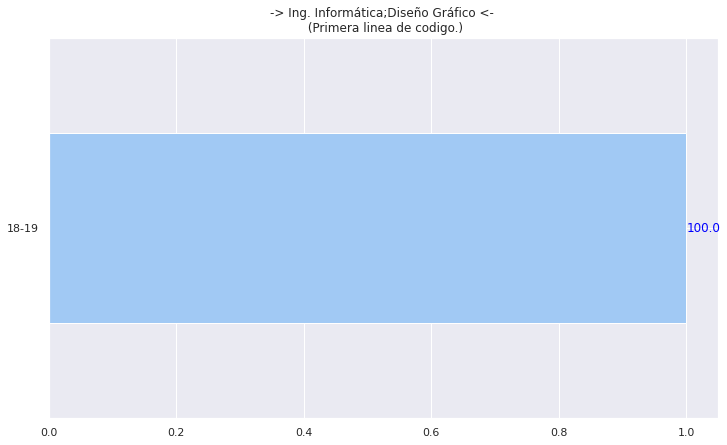





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






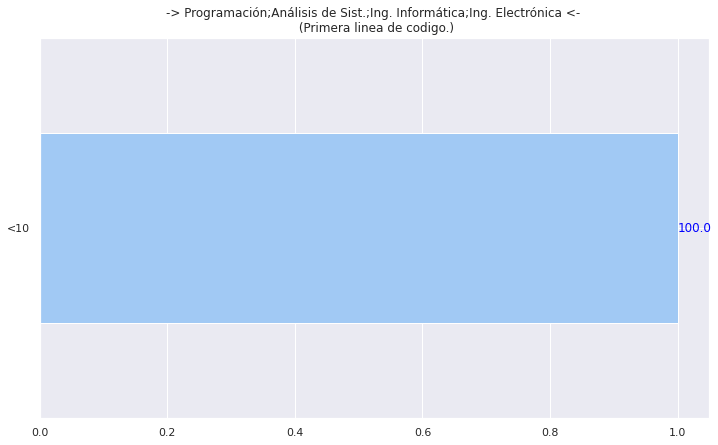





<10    1.0
Name: 1_linea_de_codigo, dtype: float64






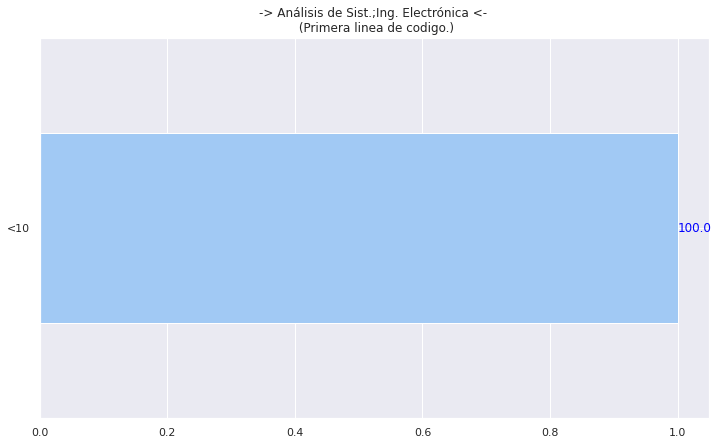





14-15    1.0
Name: 1_linea_de_codigo, dtype: float64






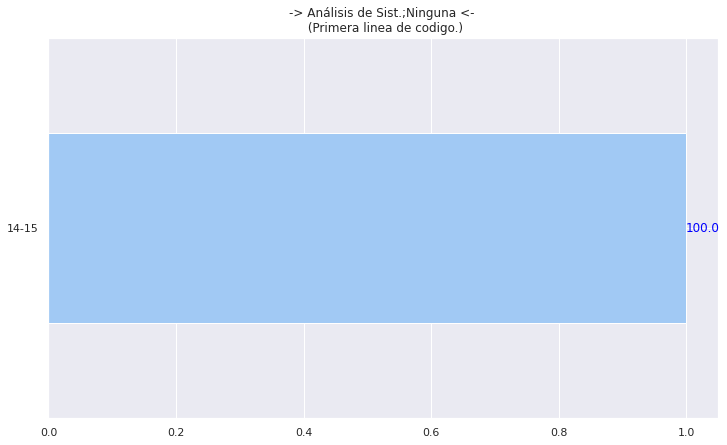





>30    1.0
Name: 1_linea_de_codigo, dtype: float64






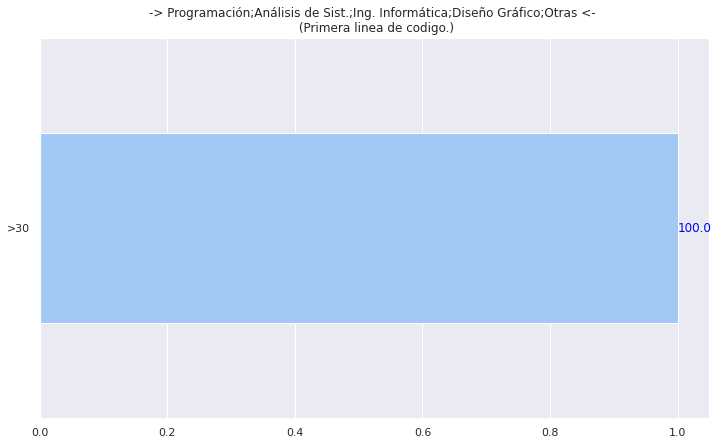





10-11    1.0
Name: 1_linea_de_codigo, dtype: float64






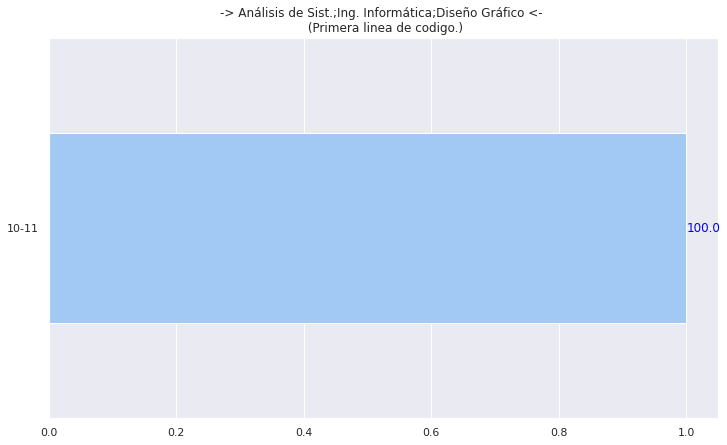

In [74]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(carreras):
    #   plt.subplot(35, 1, k + 1)
    a_df = carers.get_group(v)["1_linea_de_codigo"].value_counts(normalize=True)
    print(a_df)
    print("\n" * 3)
    a_plot = a_df.plot(title=f"-> {v} <- \n (Primera linea de codigo.)", kind="barh")

    for l, m in enumerate(a_df.values):
        a_plot.annotate("{0:.1f}".format(m * 100), (m, l), va="center", color="blue")
    plt.show()
    print("\n" * 3)


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Genero vs. 1 linea de codigo.

In [75]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [76]:
df["1_linea_de_codigo"].fillna("", inplace=True)
df["genero"].fillna("Q", inplace=True)

In [77]:
gen_linea_cod_groups = df.groupby(["genero", "1_linea_de_codigo"])

In [78]:
print(len(gen_linea_cod_groups.groups.keys()))

33


In [79]:
for i in gen_linea_cod_groups.groups.keys():
    g = gen_linea_cod_groups.get_group(i)
    print("Primera linea de codigo vs experiencia en IT. ------------> ", i)
    print(g["exp_en_IT"].value_counts(normalize=True))
    print("\n" * 3)

Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '')
5-9      0.5
10-14    0.5
Name: exp_en_IT, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '10-11')
5-9      0.400000
10-14    0.333333
<5       0.244444
20-24    0.022222
Name: exp_en_IT, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '12-13')
10-14    0.413793
5-9      0.379310
<5       0.172414
20-24    0.034483
Name: exp_en_IT, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '14-15')
10-14    0.394737
5-9      0.342105
15-19    0.184211
<5       0.078947
Name: exp_en_IT, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '16-17')
5-9      0.379310
10-14    0.310345
<5       0.137931
15-19    0.103448
>50      0.034483
20-24    0.034483
Name: exp_en_IT, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE'